# Tarea 2: Extracción de caracteristicas

Nombre: José Luis Cádiz Sejas

* Revisar diapositivas para repasar materia
* Agregar graficos de media y varianza de cada caracteristica
* Revisar mejor el codigo, adaptarlo y entenderlo
* Explicar en mayor detalle el codigo
* Ver el tema del tamaño de las ventanas acorde a las velocidades de giro
* Aplicarselo a derivada e integrales
* Concluir los mejores metodos 
* Entregar

In [46]:
# Librerias
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import numpy as np
import math
from numpy import mean, sqrt, square
from scipy.stats import kurtosis, skew
from scipy.fftpack import fft
from scipy import signal
import  pywt

In [47]:
# Lectura de datos
Datos0=sio.loadmat('H-C-1.mat') #Healthy
Datos1=sio.loadmat('I-C-1.mat') #Inner
Datos2=sio.loadmat('O-C-1.mat') #Outer
Datos3=sio.loadmat('B-C-1.mat') #Ball
Datos4=sio.loadmat('C-C-1.mat') #Combination
Normal=Datos0['Channel_1'][range(0,2000000,20),0]
Outer=Datos2['Channel_1'][range(0,2000000,20),0]
Inner=Datos1['Channel_1'][range(0,2000000,20),0]
Ball=Datos3['Channel_1'][range(0,2000000,20),0]
Combination=Datos4['Channel_1'][range(0,2000000,20),0]


In [48]:
# Frecuencia de muestreo
Fs=10*1000

# Exploración Temporal

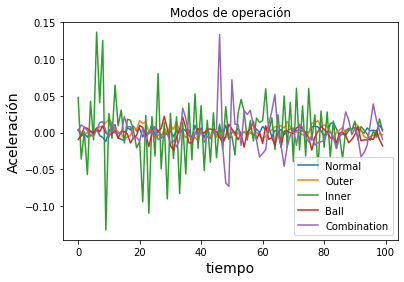

In [60]:
# Plot
plt.plot(Normal[100:200])

plt.plot(Outer[100:200])

plt.plot(Inner[100:200])

plt.plot(Ball[100:200])

plt.plot(Combination[100:200])

plt.xlabel('tiempo', fontsize=14)
plt.ylabel('Aceleración', fontsize=14)
plt.legend(['Normal','Outer','Inner','Ball','Combination'])
plt.title('Modos de operación')

plt.show()

# Dominio en el tiempo

In [49]:
#calcular parametros por tramos
N=len(Normal)
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con parametros
Pn=np.zeros((Nt,8))
Po=np.zeros((Nt,8))
Pi=np.zeros((Nt,8))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn[i-1,0]=sqrt(mean(square(Normal[inicio:fin]))) #RMS
    Pn[i-1,1]=np.amax(Normal[inicio:fin]) #Peak
    Pn[i-1,2]=np.amax(Normal[inicio:fin])-np.amin(Normal[inicio:fin]) #peak-peak
    Pn[i-1,3]=Pn[i-1,1]/Pn[i-1,0] #crest
    Pn[i-1,4]=np.mean(Normal[inicio:fin]) #Media
    Pn[i-1,5]=np.var(Normal[inicio:fin]) #var
    Pn[i-1,6]=skew(Normal[inicio:fin]) #asimetria
    Pn[i-1,7]=kurtosis(Normal[inicio:fin]) #curtosis
    
    Po[i-1,0]=sqrt(mean(square(Outer[inicio:fin]))) #RMS
    Po[i-1,1]=np.amax(Outer[inicio:fin]) #Peak
    Po[i-1,2]=np.amax(Outer[inicio:fin])-np.amin(Outer[inicio:fin]) #peak-peak
    Po[i-1,3]=Po[i-1,1]/Po[i-1,0] #crest
    Po[i-1,4]=np.mean(Outer[inicio:fin]) #Media
    Po[i-1,5]=np.var(Outer[inicio:fin]) #var
    Po[i-1,6]=skew(Outer[inicio:fin]) #asimetria
    Po[i-1,7]=kurtosis(Outer[inicio:fin]) #curtosis
    
    Pi[i-1,0]=sqrt(mean(square(Inner[inicio:fin]))) #RMS
    Pi[i-1,1]=np.amax(Inner[inicio:fin]) #Peak
    Pi[i-1,2]=np.amax(Inner[inicio:fin])-np.amin(Inner[inicio:fin]) #peak-peak
    Pi[i-1,3]=Pi[i-1,1]/Pi[i-1,0] #crest
    Pi[i-1,4]=np.mean(Inner[inicio:fin]) #Media
    Pi[i-1,5]=np.var(Inner[inicio:fin]) #var
    Pi[i-1,6]=skew(Inner[inicio:fin]) #asimetria
    Pi[i-1,7]=kurtosis(Inner[inicio:fin]) #curtosis

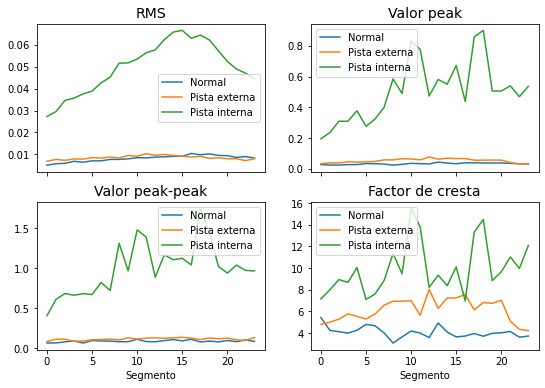

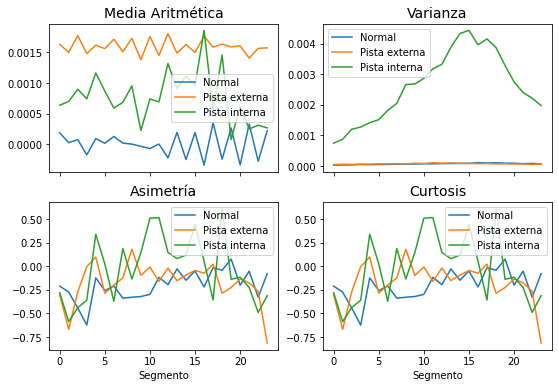

In [50]:
#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn[:,0])
ax1.plot(Po[:,0])
ax1.plot(Pi[:,0])
ax1.legend(['Normal','Pista externa','Pista interna'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn[:,1])
ax2.plot(Po[:,1])
ax2.plot(Pi[:,1])
ax2.legend(['Normal','Pista externa','Pista interna'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn[:,2])
ax3.plot(Po[:,2])
ax3.plot(Pi[:,2])
ax3.legend(['Normal','Pista externa','Pista interna'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn[:,3])
ax4.plot(Po[:,3])
ax4.plot(Pi[:,3])
ax4.legend(['Normal','Pista externa','Pista interna'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn[:,4])
ax5.plot(Po[:,4])
ax5.plot(Pi[:,4])
ax5.legend(['Normal','Pista externa','Pista interna'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn[:,5])
ax6.plot(Po[:,5])
ax6.plot(Pi[:,5])
ax6.legend(['Normal','Pista externa','Pista interna'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn[:,6])
ax7.plot(Po[:,6])
ax7.plot(Pi[:,6])
ax7.legend(['Normal','Pista externa','Pista interna'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn[:,6])
ax8.plot(Po[:,6])
ax8.plot(Pi[:,6])
ax8.legend(['Normal','Pista externa','Pista interna'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()



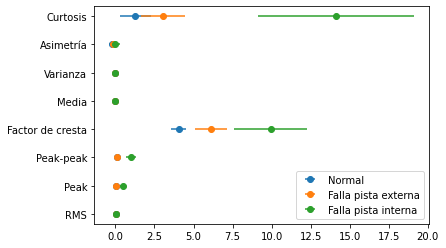

In [61]:
#etiquetas eje y
titulosy=['RMS','Peak','Peak-peak','Factor de cresta','Media','Varianza','Asimetría','Curtosis']

       
plt.figure()        
plt.errorbar(Pn.mean(axis=0), np.arange(8),xerr=Pn.std(axis=0) , fmt='o')
plt.errorbar(Po.mean(axis=0), np.arange(8),xerr=Po.std(axis=0) , fmt='o')
plt.errorbar(Pi.mean(axis=0), np.arange(8),xerr=Pi.std(axis=0) , fmt='o')
plt.yticks(np.arange(8),titulosy)
plt.legend(('Normal','Falla pista externa','Falla pista interna'))
plt.show() 

# Dominio de la frecuencia

In [62]:
Fmax=10000 #frecuencia máxima -> debe ser menor o igual a Fs/2
L=5000 #largo de los segmentos
l=1000 #overlap
nb=10 #numero de bandas

dt=1/Fs #paso de tiempo
df=Fs/L
Nf=int(Fmax/df) #numero de líneas en los espectros
N=len(Normal) #numero de datos
Nt=math.floor((N-l)/(L-l)) #total de segmentos

En=np.zeros((Nt,nb))
Eo=np.zeros((Nt,nb))
Ei=np.zeros((Nt,nb))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Fn = fft(Normal[inicio:fin])[0:Nf]/(L/2)
    Fo = fft(Outer[inicio:fin])[0:Nf]/(L/2)
    Fi = fft(Inner[inicio:fin])[0:Nf]/(L/2)
    
    Lb=int(Nf/nb)
    for k in range(1,nb+1):
        inicio=Lb*(k-1)+1
        fin=k*Lb
        En[i-1][k-1]=np.mean(abs(Fn[inicio:fin]))
        Eo[i-1][k-1]=np.mean(abs(Fo[inicio:fin]))
        Ei[i-1][k-1]=np.mean(abs(Fi[inicio:fin]))

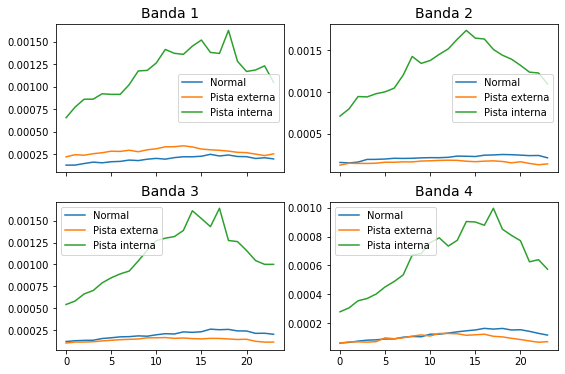

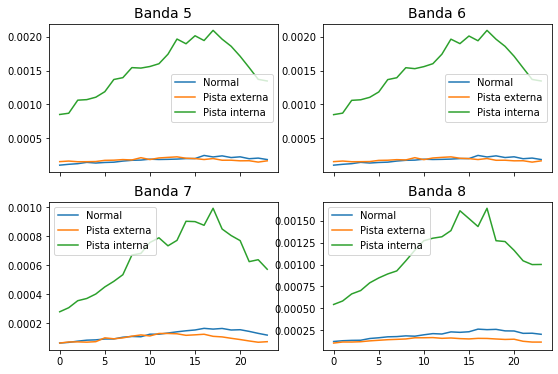

In [63]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))

ax1.plot(En[:,0])
ax1.plot(Eo[:,0])
ax1.plot(Ei[:,0])
ax1.legend(['Normal','Pista externa','Pista interna'])
ax1.set_title('Banda 1', fontsize=14)

ax2.plot(En[:,1])
ax2.plot(Eo[:,1])
ax2.plot(Ei[:,1])
ax2.legend(['Normal','Pista externa','Pista interna'])
ax2.set_title('Banda 2', fontsize=14)

ax3.plot(En[:,2])
ax3.plot(Eo[:,2])
ax3.plot(Ei[:,2])
ax3.legend(['Normal','Pista externa','Pista interna'])
ax3.set_title('Banda 3', fontsize=14)

ax4.plot(En[:,3])
ax4.plot(Eo[:,3])
ax4.plot(Ei[:,3])
ax4.legend(['Normal','Pista externa','Pista interna'])
ax4.set_title('Banda 4', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(En[:,4])
ax5.plot(Eo[:,4])
ax5.plot(Ei[:,4])
ax5.legend(['Normal','Pista externa','Pista interna'])
ax5.set_title('Banda 5', fontsize=14)

ax6.plot(En[:,5])
ax6.plot(Eo[:,5])
ax6.plot(Ei[:,5])
ax6.legend(['Normal','Pista externa','Pista interna'])
ax6.set_title('Banda 6', fontsize=14)

ax7.plot(En[:,6])
ax7.plot(Eo[:,6])
ax7.plot(Ei[:,6])
ax7.legend(['Normal','Pista externa','Pista interna'])
ax7.set_title('Banda 7', fontsize=14)

ax8.plot(En[:,7])
ax8.plot(Eo[:,7])
ax8.plot(Ei[:,7])
ax8.legend(['Normal','Pista externa','Pista interna'])
ax8.set_title('Banda 8', fontsize=14)

np.save('En.npy', En) 
np.save('Eo.npy', Eo) 
np.save('Ei.npy', Ei) 



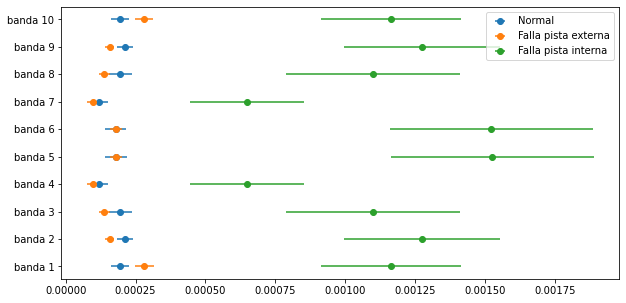

In [65]:
#etiquetas eje y
titulosy=['banda 1']
for i in range(2,nb+1):
    titulosy.append('banda ' + str(i))

plt.rcParams["figure.figsize"] = (10,5)       
plt.figure()        
plt.errorbar(En.mean(axis=0), np.arange(nb),xerr=En.std(axis=0) , fmt='o')
plt.errorbar(Eo.mean(axis=0), np.arange(nb),xerr=Eo.std(axis=0) , fmt='o')
plt.errorbar(Ei.mean(axis=0), np.arange(nb),xerr=Ei.std(axis=0) , fmt='o')
plt.yticks(np.arange(nb),titulosy)
plt.legend(('Normal','Falla pista externa','Falla pista interna'))
plt.show() 

# Metodos tiempo-frecuencia

### Espectrograma

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/4091420991.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, S1,cmap='binary')


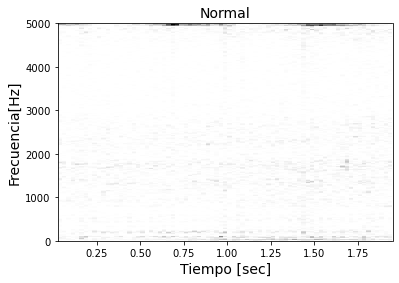

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/4091420991.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, S2,cmap='binary')


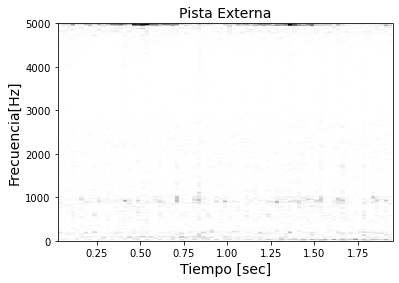

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/4091420991.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, S3,cmap='binary')


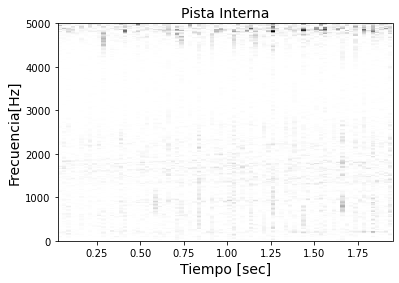

In [36]:
Nd=20000

x1=Normal[1:Nd]
f, t, S1 = signal.spectrogram(x1,Fs,window='hann',nperseg=500,noverlap=250)

x2=Outer[1:Nd]
f, t, S2 = signal.spectrogram(x2,Fs,window='hann',nperseg=500,noverlap=250)

x3=Inner[1:Nd]
f, t, S3 = signal.spectrogram(x3,Fs,window='hann',nperseg=500,noverlap=250)

plt.figure()
plt.pcolormesh(t, f, S1,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Normal', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t, f, S2,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Externa', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t, f, S3,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Interna', fontsize=14)
plt.show()


### Wavelet

In [44]:
dt=1/Fs
Nd=20000

scales=np.arange(1, 50)

x1=Normal[1:Nd]
x2=Outer[1:Nd]
x3=Inner[1:Nd]
t = np.linspace(0, (Nd-1)*dt, Nd)  # Intervalo de tiempo en segundos


C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/1898023234.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,scales,cwt1,cmap='binary')


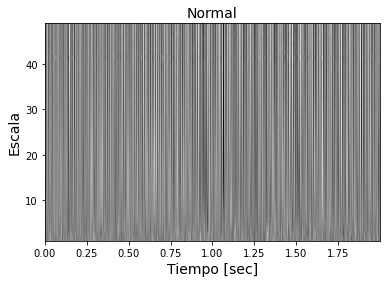

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/1898023234.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,scales,cwt2,cmap='binary')


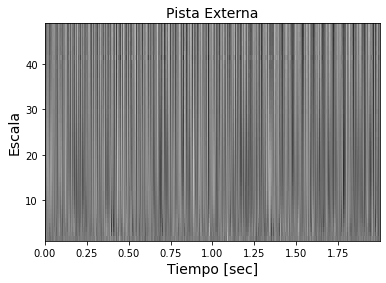

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/1898023234.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,scales,cwt3,cmap='binary')


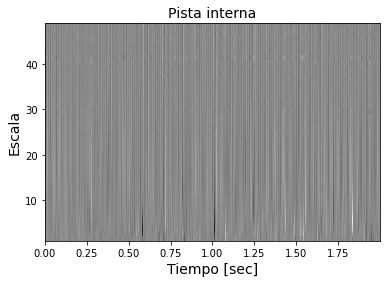

In [45]:
wavlist = pywt.wavelist(kind='continuous')

cwt1,frec1 = pywt.cwt(x1,scales,'gaus1')
cwt2,frec2 = pywt.cwt(x2,scales,'gaus1')
cwt3,frec3 = pywt.cwt(x3,scales,'gaus1')

plt.figure()
plt.pcolormesh(t,scales,cwt1,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Normal', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t,scales,cwt2,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Externa', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t,scales,cwt3,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista interna', fontsize=14)
plt.show()


# Conclusiones

Concluir mejores metodos, hacer alguna especie de ranking...